In [24]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np
 

In [2]:
train_imgs=tf.keras.utils.image_dataset_from_directory(
    "../data/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(48,48),
    shuffle=True,
    seed=123
)

print(train_imgs)

Found 28709 files belonging to 7 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>


In [3]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2
    )
print(datagen)

In [4]:
classes=train_imgs.class_names

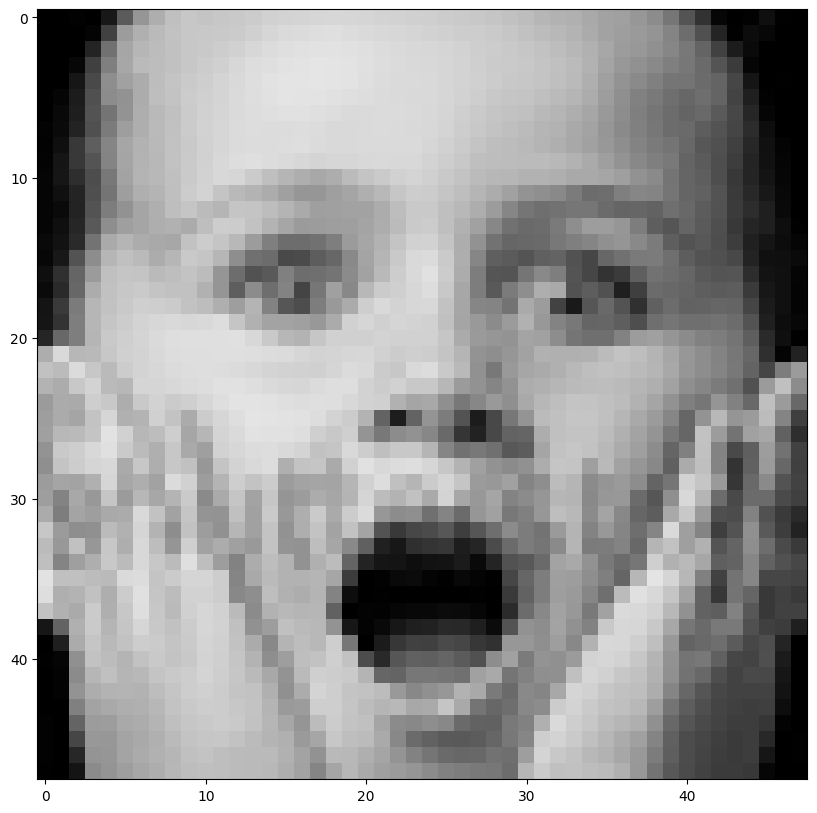

In [6]:
for img ,label in train_imgs.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.imshow(img[i].numpy().astype("uint8"))
        # plt.title(classes[label[i]])
    plt.show()
        


In [23]:
model_cnn=models.Sequential([
    
layers.Conv2D(32,(3,3),activation='relu',input_shape=(48,48,3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu'),
layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dropout(0.5),
layers.Dense(7,activation='softmax'),
])

model_cnn.summary()


c:\Users\HP\Desktop\detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,375 (478.03 KB)

 Trainable params: 122,375 (478.03 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_cnn.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
                  )


In [21]:
history=model_cnn.fit(
    train_imgs,epochs=7,validation_data=(train_imgs)
)

Epoch 1/7


898/898 ━━━━━━━━━━━━━━━━━━━━ 166s 175ms/step - accuracy: 0.2513 - loss: 1.8118 - val_accuracy: 0.2513 - val_loss: 1.8101
Epoch 2/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 200s 223ms/step - accuracy: 0.2513 - loss: 1.8117 - val_accuracy: 0.2513 - val_loss: 1.8098
Epoch 3/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 175s 192ms/step - accuracy: 0.2513 - loss: 1.8116 - val_accuracy: 0.2513 - val_loss: 1.8098
Epoch 4/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 169s 188ms/step - accuracy: 0.2513 - loss: 1.8116 - val_accuracy: 0.2513 - val_loss: 1.8100
Epoch 5/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 159s 140ms/step - accuracy: 0.2513 - loss: 1.8116 - val_accuracy: 0.2513 - val_loss: 1.8103
Epoch 6/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 176s 177ms/step - accuracy: 0.2513 - loss: 1.8114 - val_accuracy: 0.2513 - val_loss: 1.8103
Epoch 7/7
898/898 ━━━━━━━━━━━━━━━━━━━━ 177s 197ms/step - accuracy: 0.2513 - loss: 1.8111 - val_accuracy: 0.2513 - val_loss: 1.8100


In [22]:
print(model_cnn.evaluate(train_imgs))

898/898 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2513 - loss: 1.8100
[1.8100210428237915, 0.2513149082660675]


In [26]:
# model_cnn.save("cnn_saved.h5")
model_cnn.save("cnn_saved.keras")
